# Recocido simulado
Este algortimo es muy similar al algoritmo de hill climb, a diferencia de que hay que evaluar los pasos que se toman y definir una probabilidad de tomar ese paso,si el error es mayor, la probabilidad o verosimilitud de tomar ese paso va a disminuir, y viceversa.

El primer paso es calcular la diferencia entre la evaluación de la función objetivo de la solución actual y la solución de trabajo actual.

`diff = candidate_eval - curr_eval`

La temperatura inicial para la búsqueda se proporciona como un hiperparámetro y disminuye con el progreso de la búsqueda. Se pueden usar varios esquemas diferentes (programas de recocido) para disminuir la temperatura durante la búsqueda desde el valor inicial hasta un valor muy bajo, aunque es común calcular la temperatura en función del número de iteraciones.

Un ejemplo popular para calcular la temperatura es el llamado "recocido simulado rápido", calculado de la siguiente manera

`temperatura = temperatura_inicial / (número_iteración + 1)`

Agregamos uno al número de iteración en el caso de que los números de iteración comiencen en cero, para evitar un error de división por cero.

el criterio de aceptación de metrópolis y para la minimización se calcula de la siguiente manera:

`criterio = exp( -(objetivo(nuevo) – objetivo(actual)) / temperatura)`

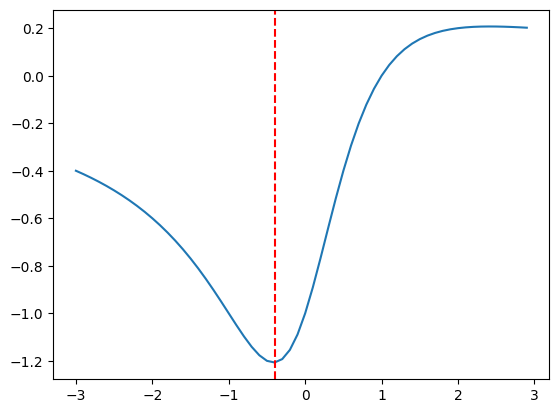

In [6]:
# funcion de optimizacion convexa
from numpy import arange
from matplotlib import pyplot

# funcion objetivo
def objective(x):
	return (x[0]-1)/((x[0]**2)+1) 

# definir rango
r_min, r_max = -3.0, 3.0
# muestrea los inputs cada 0.1 pasos
inputs = arange(r_min, r_max, 0.1)
# calcular objetivos
results = [objective([x]) for x in inputs]
# Crear plot
pyplot.plot(inputs, results)
# definir valor optimo
x_optima = -0.4
# 
pyplot.axvline(x=x_optima, ls='--', color='red')
# 
pyplot.show()

Primero, el programa de recocido rápido es una función exponencial del número de iteraciones. Podemos aclarar esto creando un gráfico de la temperatura para cada iteración del algoritmo.

Usaremos una temperatura inicial de 10 y 100 iteraciones del algoritmo, ambas elegidas arbitrariamente.

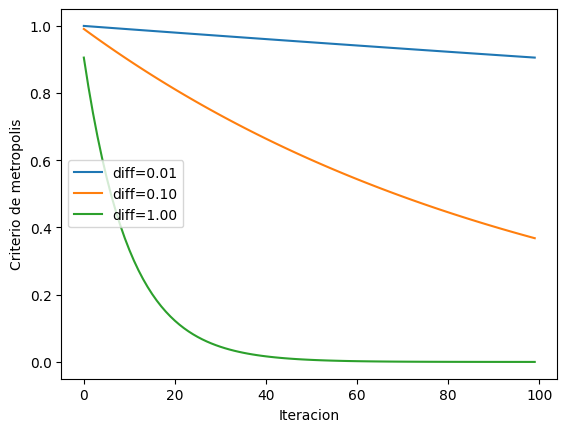

In [2]:
# explorear criterio de aceptacion de metropolis para el simualted annealing
from math import exp
from matplotlib import pyplot
# iteraciones totales
iterations = 100
# temperatura inicial
initial_temp = 10
# arreglo del interaciones de 0 a iterations -1
iterations = [i for i in range(iterations)]
# temperaturas de cada iteracion
temperatures = [initial_temp/float(i + 1) for i in iterations]
# criterio de aceptacion de metropolis
differences = [0.01, 0.1, 1.0]
for d in differences:
	metropolis = [exp(-d/t) for t in temperatures]
	# graficar
	label = 'diff=%.2f' % d
	pyplot.plot(iterations, metropolis, label=label)
# 
pyplot.xlabel('Iteracion')
pyplot.ylabel('Criterio de metropolis')
pyplot.legend()
pyplot.show()

>43 f([-0.48355127]) = -1.20240
>51 f([-0.43080593]) = -1.20683
>52 f([-0.39830019]) = -1.20684
>53 f([-0.41949148]) = -1.20708
>57 f([-0.41746676]) = -1.20710
>321 f([-0.4112952]) = -1.20710
>354 f([-0.41357063]) = -1.20711
>356 f([-0.41382355]) = -1.20711
>708 f([-0.41400334]) = -1.20711
>896 f([-0.41410519]) = -1.20711
Hecho!
f([-0.41410519]) = -1.207107


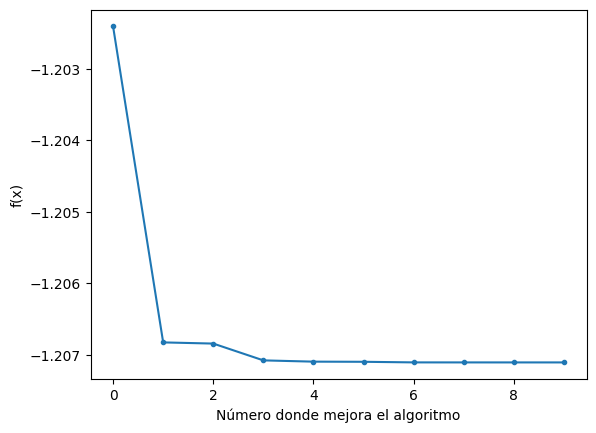

In [3]:
# recocido simulado en una funcion unidimensional
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

# funcion objetivo
def objective(x):
	return (x[0]-1)/((x[0]**2)+1) 

# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generar punto inicial
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluar punto inicial
	best_eval = objective(best)
	# solucion actual
	curr, curr_eval = best, best_eval
	scores = list()
	# correr algoritmo
	for i in range(n_iterations):
		# tamaño de paso
		candidate = curr + randn(len(bounds)) * step_size
		# evaluar punto candidato
		candidate_eval = objective(candidate)
		# revisar si es mejor solucion
		if candidate_eval < best_eval:
			# guardar el mejor punto
			best, best_eval = candidate, candidate_eval
			# mantener los mejores puntos
			scores.append(best_eval)
			# Progreso
			print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# diferencie entre el candidato y el punto actual
		diff = candidate_eval - curr_eval
		# calcular temperatura para la epoca actual
		t = temp / float(i + 1)
		# calcular metropolis acceptance criterion
		metropolis = exp(-diff / t)
		# revisar si se debe mantener el punto nuevo
		if diff < 0 or rand() < metropolis:
			# guardar el punto actual
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval, scores]

# RNG
seed(1)
# definir rango de entrada
bounds = asarray([[-3.0, 3.0]])
# definir total de iteraciones
n_iterations = 1000
# definir el tamaño de paso
step_size = 0.1
# temperatura inicial
temp = 10
# simulated annealing
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Hecho!')
print('f(%s) = %f' % (best, score))
# 
pyplot.plot(scores, '.-')
pyplot.xlabel('Número donde mejora el algoritmo')
pyplot.ylabel('f(x)')
pyplot.show()

Ejercicio

1. Cambiar la funcion objetivo con otro minimo local, ejemplo $x^{3}-3x^{2} +x$
2. CAmbia el tamaño de paso a 0.5 y observa que pasa.
3. Cambia el paso de la temperatura para minimizar el error